In [ ]:
# Visualização das soluções do modelo de Vale do Sousa (90x1 anos)
# Versão 08-09-2020

In [1]:
# INPUT
solutionFile = 'Paiva3lim3.sol'
sufixo = 'paiva'
info = 'Vale do Sousa (90 x 1ano)'
pSaveFig = 1  #  -1/0/1    -  gravação das figuras no disco

In [2]:
#  Ficheiro com vertices

file = open('ValeSousaVert.txt')
nlin = -1
Units = {}
xmin =  100000000000
xmax = -100000000000
ymin =  100000000000
ymax = -100000000000


NamUx = '000'
LVert = []

for line in file:        
    nlin += 1
    if nlin == 0:
        continue
    lex = line.split()    
    if nlin < 5 or nlin > 90475:        
        print(lex)        
    if NamUx == lex[0]:
        x = float(lex[2])
        y = float(lex[3])                  
        LVert.append((x,y))
        if xmin > x : xmin = x 
        if xmax < x : xmax = x 
        if ymin > y : ymin = y 
        if ymax < y : ymax = y             
    elif line[:3] == '###':
        Units[NamUx] = LVert
        break
    else:
        if NamUx != '000':
            Units[NamUx] = LVert
        NamUx = lex[0]
        LVert = []
        x = float(lex[2])
        y = float(lex[3])                  
        LVert.append((x,y))
        if xmin > x : xmin = x 
        if xmax < x : xmax = x 
        if ymin > y : ymin = y 
        if ymax < y : ymax = y 
file.close()


print('Numero das linhas no ficheiro: nlin=',nlin) 
print('xmin=', xmin, 'xmax=', xmax)
print('ymin=', ymin, 'ymax=', ymax)
print(len(Units))

['1', 'Paiva', '-13283.2739', '155203.0442']
['1', 'Paiva', '-13285.6826', '155204.4213']
['1', 'Paiva', '-13286.9781', '155197.2929']
['1', 'Paiva', '-13290.7630', '155197.1816']
['997', 'Paiva', '-13470.9873', '151820.4465']
['997', 'Paiva', '-13452.7525', '151850.8380']
['997', 'Paiva', '-13445.8267', '151850.6843']
['997', 'Paiva', '-13343.3433', '151848.4090']
['997', 'Paiva', '-13328.9774', '151838.9094']
['###']
Numero das linhas no ficheiro: nlin= 90481
xmin= -25760.9305 xmax= -8153.9117
ymin= 143751.6139 ymax= 166183.0345
1373


In [3]:
#  Áreas das unidades de gestão (m2)

file = open('UnitAreasVSousa.txt')
nlin = -1
Areas = {}

for line in file:        
    nlin += 1
    if nlin == 0:
        continue
    lex = line.split()    
    if nlin < 5 or nlin > 90475:        
        print(lex)
    Ar = float(lex[1])
    Areas[lex[0]] = Ar        
    
file.close()
print(nlin, len(Areas))

['1', '15658.65678', '1.565865678']
['2', '19544.90026', '1.954490026']
['6', '118737.6879', '11.87376879']
['7', '60111.76518', '6.011176518']
1373 1373


In [4]:
#  Concelhos das unidades

file = open('ug_concelhos.csv')

nlin = -1
Concel4Unid = {}
UnPaivaNorte = []
UnPaivaSul = []
UnPenafiel = []
UnParedes = []

for line in file:        
    nlin += 1
    if nlin == 0:
        continue
    lex = line.split(',')
    
    if nlin < 5 or nlin > 1310:
        print(lex)
    
    Concel4Unid[lex[0]] = lex[1]
    
    if lex[1] == "PaivaNorte":
        UnPaivaNorte.append(lex[0])
    elif lex[1] == "PaivaSul":
        UnPaivaSul.append(lex[0])
    elif lex[1] == "Penafiel":
        UnPenafiel.append(lex[0])
    elif lex[1] == "Paredes":
        UnParedes.append(lex[0])
    else:
        print('Unknown: ', line)
    
file.close()
print(nlin, len(Concel4Unid))
#print(UnPaivaNorte)
#print(UnPaivaSul)
#print(UnParedes)
#print(UnPenafiel)
#print(Concel4Unid)

['1', 'PaivaNorte', 'Castelo de Paiva\n']
['2', 'PaivaNorte', 'Castelo de Paiva\n']
['6', 'PaivaNorte', 'Castelo de Paiva\n']
['7', 'PaivaNorte', 'Castelo de Paiva\n']
['3213', 'PaivaSul', 'Castelo de Paiva\n']
['3214', 'PaivaSul', 'Castelo de Paiva\n']
['3215', 'PaivaSul', 'Castelo de Paiva\n']
['3216', 'PaivaSul', 'Castelo de Paiva\n']
['3217', 'PaivaNorte', 'Castelo de Paiva\n']
1315 1315


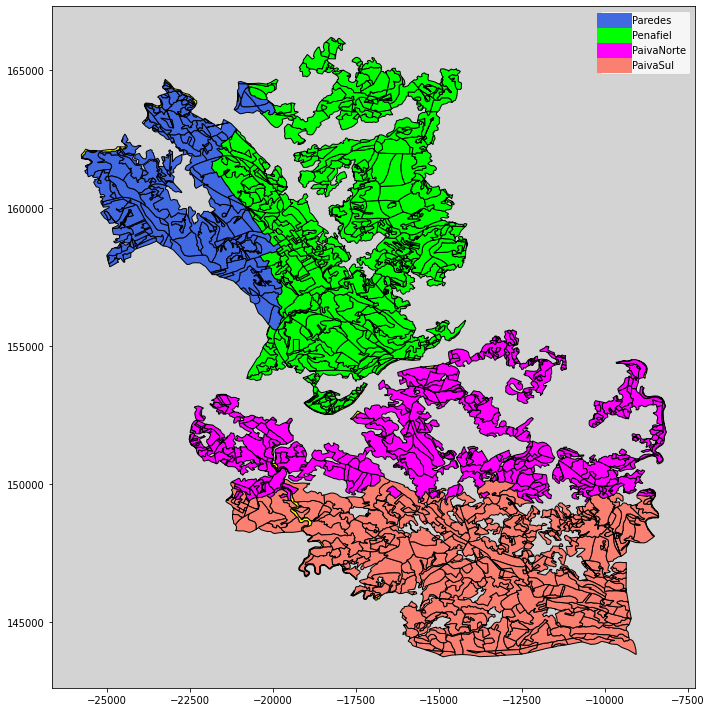

In [5]:
#%matplotlib notebook 
import matplotlib.pyplot as plt

Cores = {'PaivaNorte':'fuchsia','PaivaSul':'salmon', 'Penafiel':'lime', 'Paredes':'royalblue'}

fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_facecolor('lightgray')

K = sorted(list(Units.keys()))

for key in K:    
    xx = []
    yy = []
    for v in Units[key]:
        xx.append(v[0])
        yy.append(v[1])
    if int(key) >= 4000:
        clr = 'yellow'        
    else:
        clr = Cores[Concel4Unid[key]]
    plt.fill(xx, yy, facecolor=clr, edgecolor='black', linewidth=1)

#ax.xlim=(-25000, -15000)
#ax.ylim=(150000, 1800000)    

plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Cores['Paredes'],   label='Paredes')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Cores['Penafiel'],  label='Penafiel')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Cores['PaivaNorte'],label='PaivaNorte')
plt.plot([-25000, -25010], [165000, 165010], lw=15, c=Cores['PaivaSul'],  label='PaivaSul')
plt.plot([-25000, -25010], [165000, 165010], lw=17, c='lightgray')
plt.legend()
plt.tight_layout()
    
#plt.savefig('VSousaBlocos.svg',dpi=100)
plt.show(plt)

In [ ]:
# Ficheiro das Prescrições - VS3

file = open('PrescVS_1.txt')
nlin = -1

TabPreVS = {}

Parx = 'xxx'
Prex = 'xxx'

for line in file:        
    nlin += 1
    if nlin == 0:
        print(line)
        continue    
    lex = line.split()    
    if nlin < 5 or nlin > 143940:            
        print(nlin,'lex=',lex)
  
    if lex[0] != Parx:
        Parx = lex[0]
        TabPreVS[Parx] = {}
        Prex = 'xxx'
    if lex[1] != Prex:
        Prex = lex[1]
        TabPreVS[Parx][Prex] = []
    for i in range(2,6):
        lex[i] = float(lex[i])
    lex[6] = int(lex[6])        
    TabPreVS[Parx][Prex].append(lex[2:])
    
file.close()
print('Número das linhas no ficheiro: nlin=',nlin) 
Un = sorted(list(TabPreVS.keys()))
#print(Un)
print('Número das Unidades na Tabela=', len(Un))

In [ ]:
Sol = []

def sol_input(fname):
    
    print('File=', fname)
    file = open(fname)

    nlin = 0
    pr = 0
    for line in file:        
        nlin += 1
        if pr==0 and line[:13]=="Variable Name":
            pr = 1
            continue
        if pr==1 and line[:19]=="All other variables": 
            pr = 2
            break
        if pr==0:
            continue
        if line[:5] != 'Presc':
            continue
        if line[:8] == 'Presc800':
            continue                
        lex  = line.split()
        lexp = lex[0].split('_')
    
        if int(lexp[1][2:]) < 4000:
            buf = [lexp[1][2:], lexp[0][5:], lexp[2], lexp[3], lex[0], nlin]   
            Sol.append(buf)
    file.close()    
    print('Número das linhas no ficheiro: nlin=',nlin) 
    print('Número das variáveias não nulas=', len(Sol))    

In [ ]:
# Solution input
Sol = []

sol_input(solutionFile)
    
Sol[:5], Sol[-5:]

In [ ]:
# Solução + Prescrições = Madeira
import numpy as np

MAD = []
for k in range(90):    # para 90 periodos de 1 anos
    Ctt = ['Ctt',0,'X']  # V_thin, Parcelas...    
    Cth = ['Cth',0,'X']  # V_harv, Parcelas...        
    Ect = ['Ect',0,'X']  # V_thin, Parcelas...
    Ech = ['Ech',0,'X']  # V_harv, Parcelas...    
    Pbt = ['Pbt',0,'X']  # V_thin, Parcelas...    
    Pbh = ['Pbh',0,'X']  # V_harv, Parcelas...        
    Qrt = ['Qrt',0,'X']  # V_thin, Parcelas...
    Qrh = ['Qrh',0,'X']  # V_harv, Parcelas...    
    Sbt = ['Sbt',0,'X']  # V_thin, Parcelas...    
    Sbx = ['Sbx',0,'X']  # V_thin+cork, Parcelas...            
    Sbc = ['Sbc',0,'X']  # V_cork, Parcelas...        
    period = [Ctt, Cth, Ect, Ech, Pbt, Pbh, Qrt, Qrh, Sbt, Sbx, Sbc]
    MAD.append(period)

eps = 0.000001    
for lin in Sol:
    ##print(lin)
    
    try:    
        Q = TabPreVS[lin[0]][lin[1]]   # Parc Pres
    except KeyError:
        print('KeyError:  ', 'Pa=', lin[0], 'Presc=', lin[1], 'var=', lin[4])
        continue
        
    for st in Q:
        ##print('st:', st, st[5],st[4])
        if   st[5] == 'Ct':
            if st[0] > eps and st[1] < eps:                      
                MAD[st[4]-1][0].append(lin[0])
                MAD[st[4]-1][0][1] += st[0] 
            elif st[0] < eps and st[1] > eps:   
                MAD[st[4]-1][1].append(lin[0])
                MAD[st[4]-1][1][1] += st[1] 
            elif st[0] > eps and st[1] > eps:   
                MAD[st[4]-1][1].append(lin[0])
                MAD[st[4]-1][0][1] += st[0]
                MAD[st[4]-1][1][1] += st[1]
            else:
                print('Aviso 11', st, lin[0], lin[1])
        elif st[5] == 'Ec':
            if st[0] > eps and st[1] < eps:
                MAD[st[4]-1][2].append(lin[0])
                MAD[st[4]-1][2][1] += st[0] 
            elif st[0] < eps and st[1] > eps:
                MAD[st[4]-1][3].append(lin[0])
                MAD[st[4]-1][3][1] += st[1] 
            elif st[0] < eps and st[1] < eps:
                pass                              
            else:
                print('Aviso 12', st, lin[0], lin[1])               
        elif st[5] == 'Pb':            
            if st[0] > eps and st[1] < eps:
                MAD[st[4]-1][4].append(lin[0])
                MAD[st[4]-1][4][1] += st[0]                 
            elif st[0] < eps and st[1] > eps:
                MAD[st[4]-1][5].append(lin[0])
                MAD[st[4]-1][5][1] += st[1]   
            elif st[0] > eps and st[1] > eps:
                MAD[st[4]-1][5].append(lin[0])
                MAD[st[4]-1][4][1] += st[0]                                                 
                MAD[st[4]-1][5][1] += st[1]                                 
            else:
                print('Aviso 13', st, lin[0], lin[1])
        elif st[5] == 'Qr':
            if st[0] > eps and st[1] < eps:
                MAD[st[4]-1][6].append(lin[0])
                MAD[st[4]-1][6][1] += st[0] 
            elif st[0] < eps and st[1] > eps:
                MAD[st[4]-1][7].append(lin[0])
                MAD[st[4]-1][7][1] += st[1] 
            else:                
                print('Aviso 14', st, lin[0], lin[1])
        elif st[5] == 'Sb':
            if st[0] > eps and st[3] < eps:   
                MAD[st[4]-1][8].append(lin[0])
                MAD[st[4]-1][8][1] += st[0] 
            elif st[0] < eps and st[3] > eps:   
                MAD[st[4]-1][10].append(lin[0])
                MAD[st[4]-1][10][1] += st[3]                                 
            elif st[0] > eps and st[3] > eps:   
                MAD[st[4]-1][9].append(lin[0])
                MAD[st[4]-1][8][1]  += st[0] 
                MAD[st[4]-1][10][1] += st[3] 
            else:                
                print('Aviso 15', st, lin[0], lin[1])
        else:
            print('Aviso 10: ', st[5], st, lin[0], lin[1])
            break    
print('Ready')

In [ ]:
import matplotlib.pyplot as plt

Clrs = ['gold', 'darkgoldenrod',
        'lightcoral',  'red',
        'lightgreen', 'green',
        'cornflowerblue', 'blue',
        'magenta', 'purple', 'indigo']

K = sorted(list(Units.keys()))

for period in range(0,20):   # [2, 6, 20, 29]:  
    
    if pSaveFig < 0:
        break

    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_facecolor('lightgray')
    
    plt.plot([-25000, -25001], [165000, 165001], lw=15, c=Clrs[0],  label='Ct-thin')
    plt.plot([-25000, -25001], [165000, 165001], lw=15, c=Clrs[1],  label='Ct-harv')    
    plt.plot([-25000, -25001], [165000, 165001], lw=15, c=Clrs[3],  label='Ec-harv')
    plt.plot([-25000, -25001], [165000, 165001], lw=15, c=Clrs[4],  label='Pb-thin')
    plt.plot([-25000, -25001], [165000, 165001], lw=15, c=Clrs[5],  label='Pb-harv')
    plt.plot([-25000, -25001], [165000, 165001], lw=15, c=Clrs[6],  label='Qr-thin')
    plt.plot([-25000, -25001], [165000, 165001], lw=15, c=Clrs[7],  label='Qr-harv')
    plt.plot([-25000, -25001], [165000, 165001], lw=15, c=Clrs[8],  label='Sb-thin')
    plt.plot([-25000, -25001], [165000, 165001], lw=15, c=Clrs[9],  label='Sb-thco')
    plt.plot([-25000, -25001], [165000, 165001], lw=15, c=Clrs[10], label='Sb-cork')
    plt.plot([-25000, -25001], [165000, 165001], lw=17, c='lightgray')
    plt.legend()
        
    for key in K:
        xx = []
        yy = []
        for v in Units[key]:
            xx.append(v[0])
            yy.append(v[1])
        ax.fill(xx, yy, facecolor='white', edgecolor='black', linewidth=1)

    MADp = MAD[period]
    nclr = 0
    for esp in MADp:    
        for key in esp[3:] :
            xx = []
            yy = []
            for v in Units[key]:
                xx.append(v[0])
                yy.append(v[1])
            ax.fill(xx, yy, facecolor=Clrs[nclr], edgecolor='black', linewidth=1)  # thin
        nclr += 1
    
    
    plt.text(-26000, 143000, info, fontsize=12)
    st = str(period+1)
    buf = 'Period = '+st
    plt.text(-26000, 166000, buf, fontsize=12)    
    print(buf)
    
    #ax.xlim=((-20000, -15000))
    #ax.ylim=((150000, 170000))
    
    plt.tight_layout()
    if pSaveFig == 1:
        plt.savefig('VSousa-'+sufixo+'-'+st+'.png', dpi=100)
    plt.show(plt)
print('Ready')

In [ ]:
#####################################################################################
#####################################################################################

In [ ]:
# Produção de Madeira

"""
MAD = []
for k in range(9):    # para 9 periodos de 10 anos
    Ctt = ['Ctt',0,'X']  # V_thin, Parcelas...       0
    Cth = ['Cth',0,'X']  # V_harv, Parcelas...       1    
    Ect = ['Ect',0,'X']  # V_thin, Parcelas...       2
    Ech = ['Ech',0,'X']  # V_harv, Parcelas...       3
    Pbt = ['Pbt',0,'X']  # V_thin, Parcelas...       4
    Pbh = ['Pbh',0,'X']  # V_harv, Parcelas...       5    
    Qrt = ['Qrt',0,'X']  # V_thin, Parcelas...       6
    Qrh = ['Qrh',0,'X']  # V_harv, Parcelas...       7
    Sbt = ['Sbt',0,'X']  # V_thin, Parcelas...       8
    Sbx = ['Sbx',0,'X']  # V_thin+cork, Parcelas...  9            
    Sbc = ['Sbc',0,'X']  # V_cork, Parcelas...      10    
    period = [Ctt, Cth, Ect, Ech, Pbt, Pbh, Qrt, Qrh, Sbt, Sbx, Sbc]
    MAD.append(period)
"""
#print(MAD)

ProdMAD = {'Ctt':[],'Cth':[],'CtT':[], 'EcT':[], 'Pbt':[], 'Pbh':[], 'PbT':[], 'Qrt':[],
           'Qrh':[], 'QrT':[], 'Sbt':[], 'Sbh':[], 'Sbc':[], 'Tot':[]}

for k in range(90):    
    ProdMAD['Ctt'].append(MAD[k][0][1])
    ProdMAD['Cth'].append(MAD[k][1][1])
    ProdMAD['CtT'].append(MAD[k][0][1] + MAD[k][1][1])
    s = MAD[k][0][1] + MAD[k][1][1]
    ProdMAD['EcT'].append(MAD[k][3][1])
    s += MAD[k][3][1] 
    ProdMAD['Pbt'].append(MAD[k][4][1])
    ProdMAD['Pbh'].append(MAD[k][5][1])
    ProdMAD['PbT'].append(MAD[k][4][1] + MAD[k][5][1])
    s += MAD[k][4][1] + MAD[k][5][1] 
    ProdMAD['Qrt'].append(MAD[k][6][1])
    ProdMAD['Qrh'].append(MAD[k][7][1])
    ProdMAD['QrT'].append(MAD[k][6][1] + MAD[k][7][1])    
    s += MAD[k][6][1] + MAD[k][7][1]
    ProdMAD['Sbt'].append(MAD[k][8][1])
    s += MAD[k][8][1]
    ProdMAD['Sbc'].append(MAD[k][10][1])    
    ProdMAD['Tot'].append(s)
#print(ProdMAD)

def tabprint(str):
    print('\n{0:s}:'.format(str), end='')
    for k in range(90):
        if (k+1)%10==0:
            fim = '\n    '
        else:
            fim = ''
        print(' {0:10.2f}'.format(ProdMAD[str][k]),end=fim)
        
print(info)
print('Produção de Madeira por períodos\n  ',end='')
for v in range(1,11): print(' {0:10d}'.format(v), end='') 

tabprint('Tot')
tabprint('CtT')
tabprint('EcT')
tabprint('PbT')
tabprint('QrT')
tabprint('Sbt')
tabprint('Sbc') 


In [ ]:
import matplotlib.pyplot as plt

t = range(1,91) 
#digsize=(10,6))
plt.plot(t, ProdMAD['Tot'], '-o', c='k', lw=4, label = 'Total')
plt.plot(t, ProdMAD['CtT'], '-o', c=Clrs[1],  label = 'Ct')
plt.plot(t, ProdMAD['EcT'], '-o', c=Clrs[3],  label = 'Ec')
plt.plot(t, ProdMAD['PbT'], '-o', c=Clrs[5],  label = 'Pb')
plt.plot(t, ProdMAD['QrT'], '-o', c=Clrs[7],  label = 'Qr')
plt.plot(t, ProdMAD['Sbt'], '-o', c=Clrs[10], label = 'Sb')
plt.xlabel('Period')
plt.ylabel('Wood')
plt.grid() 
plt.legend()
if pSaveFig == 1:
    plt.savefig('VSousa-Mad-'+sufixo+'.png', dpi=100)
plt.show()
#-------------------------

fig6 = plt.figure(figsize=(10,6))
plt.stackplot(t, ProdMAD['CtT'], ProdMAD['EcT'], ProdMAD['PbT'], ProdMAD['QrT'], ProdMAD['Sbt'],
              labels = ['Ct', 'Ec', 'Pb', 'Qr', 'Sb'],
              colors= [Clrs[1],Clrs[3],Clrs[5],Clrs[7],Clrs[10]] )
plt.grid() 
plt.legend(loc='upper left')
plt.xlabel('Period')
plt.ylabel('Wood')
if pSaveFig == 1:
    plt.savefig('VSousa-Mad+'+sufixo+'.png', dpi=100)
plt.show()
#-------------------------

fig7 = plt.figure(figsize=(10,4))
plt.plot(t, ProdMAD['Sbc'], '-o', c=Clrs[10], label='Cork')
plt.xlabel('Period')
plt.ylabel('Cork')
plt.legend()
plt.grid()
if pSaveFig == 1:
    plt.savefig('VSousa-Cork-'+sufixo+'.png', dpi=100)
plt.show()
